# 전국 신규 민간 아파트 분양가격 동향

- 2013년부터 최근까지 신규 미간아파트 분양가격 변화를 분석.
- 공공데이터 포털에서 데이터를 수집
- Pandas의 melt, concat, pivot, transpose 와 같은 reshape 기능과 groupby, pivot_table, info, describe, value_counts 등을 통한 데이터 요약과 분석
- 전처리 한 결과에 대해 이해하고 다양한 그래프로 시각화

## 1. 데이터 수집과 전처리
- 다운로드 위치 : https://www.data.go.kr/data/15061057/fileData.do
- 전국 공동주택의 연도별, 월별, 전용면적별 제곱미터당 평균분양가격 데이터를 제공

### 1.1 데이터 로드


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Magic Command : 주피터 노트북에서 제공해주는 특별 동작 명령어.
%ls data64

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 4EBE-5D31

 C:\Users\ict06\Documents\sd_python\data64 디렉터리

2021-08-17  오전 09:17    <DIR>          .
2021-08-17  오전 09:17    <DIR>          ..
2021-08-17  오전 09:09             2,163 전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv
2021-08-17  오전 09:13           266,230 주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20210630.csv
               2개 파일             268,393 바이트
               2개 디렉터리  397,318,942,720 바이트 남음


**엑셀데이터를 csv로 저장시 cp949(ms)로 유니코드 방식이 저장된다.**   
**< 해결방법 >**
- 엑셀에서 utf8형식으로 다시 저장하기
- read_csv에서 encoding = 'cp949'지정하기


In [5]:
#2013~ 까지 데이터 로드
df1 = pd.read_csv('data64/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv',encoding='cp949')  # 인코딩 형식 확인하고 지정해주기
df1

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231
5,대전,8321,8321,8321,8341,8341,8341,8333,8333,8333,...,8067,8067,8067,8067,8067,8145,8272,8079,8079,8079
6,울산,8090,8090,8090,8153,8153,8153,8153,8153,8493,...,8891,8891,8526,8526,8629,9380,9192,9190,9190,9215
7,경기,10855,10855,10791,10784,10876,10646,10266,10124,10134,...,10356,10379,10391,10355,10469,10684,10685,10573,10518,10573
8,세종,7601,7600,7532,7814,7908,7934,8067,8067,8141,...,8592,8560,8560,8560,8555,8546,8546,8671,8669,8695
9,강원,6230,6230,6230,6141,6373,6350,6350,6268,6268,...,6365,6365,6348,6350,6182,6924,6846,6986,7019,7008


In [38]:
# 2015년 10월~ 데이터 로드
df2 = pd.read_csv('data64/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20210630.csv',encoding='cp949')
df2

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879
...,...,...,...,...,...
5860,제주,모든면적,2021,6,7510
5861,제주,전용면적 60제곱미터이하,2021,6,NaN
5862,제주,전용면적 60제곱미터초과 85제곱미터이하,2021,6,7497
5863,제주,전용면적 85제곱미터초과 102제곱미터이하,2021,6,NaN


### 1.2 데이터 요약하기

In [8]:
# info 로 요약합니다.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5865 entries, 0 to 5864
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         5865 non-null   object
 1   규모구분        5865 non-null   object
 2   연도          5865 non-null   int64 
 3   월           5865 non-null   int64 
 4   분양가격(제곱미터)  5409 non-null   object
dtypes: int64(2), object(3)
memory usage: 229.2+ KB


### 1.3. 결측치 보기

- isnull 혹은 isna 
- 결측치는 True로 표시 -> True == 1 이기 때문에 이 값을 다 더해주면 결측치의 수가 된다.

In [9]:
df2.isnull()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
5860,False,False,False,False,False
5861,False,False,False,False,True
5862,False,False,False,False,False
5863,False,False,False,False,True


In [ ]:
True ==1
False ==0
# 이용

In [10]:
df2.isnull().sum()

지역명             0
규모구분            0
연도              0
월               0
분양가격(제곱미터)    456
dtype: int64

### 1.4. 데이터 타입 변경
- 분양가격 : object(문자) -> 계산을 위해서 수치데이터로 변경
- pd.to_numeric을 이용해 데이터의 타입을 변경

In [11]:
df2['분양가격(제곱미터)'].astype(int)

ValueError: invalid literal for int() with base 10: '  '

In [39]:
df2['분양가격'] = pd.to_numeric(df2['분양가격(제곱미터)'],errors='coerce')  # errors='coerce' : error가 난 것들을 전부 Nan값으로 바꿔줌 >>상황에 따라 판단하여 사용(6,656같은 값들도 전부 Nan으로 바꿔버리기 때문에)
df2

,지역명,규모구분,연도,월,분양가격(제곱미터),분양가격
0,서울,모든면적,2015,10,5841,5841.0
1,서울,전용면적 60제곱미터이하,2015,10,5652,5652.0
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882,5882.0
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,5721.0
4,서울,전용면적 102제곱미터초과,2015,10,5879,5879.0
...,...,...,...,...,...,...
5860,제주,모든면적,2021,6,7510,7510.0
5861,제주,전용면적 60제곱미터이하,2021,6,NaN,NaN
5862,제주,전용면적 60제곱미터초과 85제곱미터이하,2021,6,7497,7497.0
5863,제주,전용면적 85제곱미터초과 102제곱미터이하,2021,6,NaN,NaN


In [17]:
type(np.nan)

float

In [18]:
df2['분양가격'].mean()

3433.9815685536955

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5865 entries, 0 to 5864
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         5865 non-null   object 
 1   규모구분        5865 non-null   object 
 2   연도          5865 non-null   int64  
 3   월           5865 non-null   int64  
 4   분양가격(제곱미터)  5409 non-null   object 
 5   분양가격        5317 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 275.0+ KB


### 1.5. 평당분양가격 구하기

In [21]:
# df1의 데이터는 평당분양가격 기준
df1.head(1)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443


In [23]:
# df2는 제곱미터
df2.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),분양가격
0,서울,모든면적,2015,10,5841,5841.0
1,서울,전용면적 60제곱미터이하,2015,10,5652,5652.0
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882,5882.0
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,5721.0
4,서울,전용면적 102제곱미터초과,2015,10,5879,5879.0


In [40]:
df2['평당분양가격'] = df2['분양가격']*3.3
df2.head(1)

,지역명,규모구분,연도,월,분양가격(제곱미터),분양가격,평당분양가격
0,서울,모든면적,2015,10,5841,5841.0,19275.3


### 1.6.분양가격 요약하기

In [25]:
# info를 통해 분양가격을 봅니다.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5865 entries, 0 to 5864
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         5865 non-null   object 
 1   규모구분        5865 non-null   object 
 2   연도          5865 non-null   int64  
 3   월           5865 non-null   int64  
 4   분양가격(제곱미터)  5409 non-null   object 
 5   분양가격        5317 non-null   float64
 6   평당분양가격      5317 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 320.9+ KB


In [26]:
df2['분양가격(제곱미터)'].describe()  # unique : 중복되지 않은 값의 수 / top : 가장 많이 나온 값 / freq : top값이 나온 횟수

count     5409
unique    2207
top       3395
freq        18
Name: 분양가격(제곱미터), dtype: object

In [27]:
df2['규모구분'].describe()

count              5865
unique                5
top       전용면적 60제곱미터이하
freq               1173
Name: 규모구분, dtype: object

In [28]:
df2['분양가격'].describe()

count     5317.000000
mean      3433.981569
std       1399.069055
min       1868.000000
25%       2557.000000
50%       3053.000000
75%       3898.000000
max      13835.000000
Name: 분양가격, dtype: float64

### 1.7.규모구분을 전용면적 컬럼으로 변경
- [규모구분] column 수정하기 : "전용면적 60제곱미터초과 85제곱미터이하" -> "60㎡~85㎡" 로 변경(ㄹ한자)

* pandas 의 string-handling :https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling

In [29]:
df2.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),분양가격,평당분양가격
0,서울,모든면적,2015,10,5841,5841.0,19275.3
1,서울,전용면적 60제곱미터이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882,5882.0,19410.6
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102제곱미터초과,2015,10,5879,5879.0,19400.7


In [30]:
df2['규모구분'].unique()

array(['모든면적', '전용면적 60제곱미터이하', '전용면적 60제곱미터초과 85제곱미터이하',
       '전용면적 85제곱미터초과 102제곱미터이하', '전용면적 102제곱미터초과'], dtype=object)

In [46]:

df2['규모구분'] = df2['규모구분'].str.replace('전용면적','')
df2['규모구분'] = df2['규모구분'].str.replace('초과','~')
df2['규모구분'] = df2['규모구분'].str.replace('이하','')
df2['규모구분'] = df2['규모구분'].str.replace('제곱미터','㎡')
df2['규모구분'] = df2['규모구분'].str.replace(' ','')
df2['규모구분'] = df2['규모구분'].str.strip()


df2['규모구분']


0           모든면적
1            60㎡
2        60㎡~85㎡
3       85㎡~102㎡
4          102㎡~
          ...   
5860        모든면적
5861         60㎡
5862     60㎡~85㎡
5863    85㎡~102㎡
5864       102㎡~
Name: 규모구분, Length: 5865, dtype: object

### 1.8.필요없는 컬럼 제거하기

In [47]:
df2.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),분양가격,평당분양가격
0,서울,모든면적,2015,10,5841,5841.0,19275.3
1,서울,60㎡,2015,10,5652,5652.0,18651.6
2,서울,60㎡~85㎡,2015,10,5882,5882.0,19410.6
3,서울,85㎡~102㎡,2015,10,5721,5721.0,18879.3
4,서울,102㎡~,2015,10,5879,5879.0,19400.7


In [48]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5865 entries, 0 to 5864
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         5865 non-null   object 
 1   규모구분        5865 non-null   object 
 2   연도          5865 non-null   int64  
 3   월           5865 non-null   int64  
 4   분양가격(제곱미터)  5409 non-null   object 
 5   분양가격        5317 non-null   float64
 6   평당분양가격      5317 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 320.9+ KB


In [51]:
df2 = df2.drop(['분양가격(제곱미터)'], axis=1)

In [52]:
df2.head()

,지역명,규모구분,연도,월,분양가격,평당분양가격
0,서울,모든면적,2015,10,5841.0,19275.3
1,서울,60㎡,2015,10,5652.0,18651.6
2,서울,60㎡~85㎡,2015,10,5882.0,19410.6
3,서울,85㎡~102㎡,2015,10,5721.0,18879.3
4,서울,102㎡~,2015,10,5879.0,19400.7


In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5865 entries, 0 to 5864
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     5865 non-null   object 
 1   규모구분    5865 non-null   object 
 2   연도      5865 non-null   int64  
 3   월       5865 non-null   int64  
 4   분양가격    5317 non-null   float64
 5   평당분양가격  5317 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 275.0+ KB


## 2. 데이터 집계하기

### 2.1. groupby 로 데이터 집계하기

In [56]:
# 지역명으로 분양가격의 평균을 구하고 막대그래프(bar)로 시각화 
df2.groupby(['지역명'])['평당분양가격'].mean()


지역명
강원     8539.866768
경기    13780.955294
경남     9716.366465
경북     8881.334483
광주    11000.277895
대구    12908.695482
대전    10485.775984
부산    12463.265294
서울    25133.343529
세종    10197.023158
울산    11059.632110
인천    12830.350893
전남     8107.378743
전북     7941.425519
제주    12380.626619
충남     8504.325466
충북     7862.835799
Name: 평당분양가격, dtype: float64

In [57]:
# 지역별 평당분양가격의 통계값
df2.groupby(['지역명'])['평당분양가격'].describe()

,count,mean,std,min,25%,50%,75%,max
지역명,,,,,,,,
강원,328.0,8539.866768,1664.542465,6639.6,7329.300,7966.20,9422.325,14100.9
경기,340.0,13780.955294,1951.640911,10160.7,12007.875,13949.10,14834.325,18958.5
경남,331.0,9716.366465,1769.936609,7260.0,8776.350,9494.10,10233.300,16566.0
경북,319.0,8881.334483,1368.933587,6949.8,7915.050,8659.20,9538.650,13450.8
광주,285.0,11000.277895,2166.896851,7428.3,9167.400,10645.80,12681.900,16107.3
대구,332.0,12908.695482,2333.053077,8259.9,10612.800,13120.80,15110.700,17021.4
대전,254.0,10485.775984,2081.512845,8002.5,8778.000,10109.55,11662.200,16094.1
부산,340.0,12463.265294,1433.324010,9669.0,11406.450,12721.50,13411.200,15255.9
서울,340.0,25133.343529,4772.841361,16701.3,21662.025,24076.80,27182.925,45655.5


In [59]:
# 전용면적으로 분양가격의 평균
df2.groupby(['규모구분'])['평당분양가격'].mean()

규모구분
102㎡~       12198.184593
60㎡         10958.201018
60㎡~85㎡     10893.242004
85㎡~102㎡    11860.927784
모든면적        10912.160035
Name: 평당분양가격, dtype: float64

In [65]:
df2 = df2.rename(columns={'규모구분':'전용면적'})
df2

,지역명,전용면적,연도,월,분양가격,평당분양가격
0,서울,모든면적,2015,10,5841.0,19275.3
1,서울,60㎡,2015,10,5652.0,18651.6
2,서울,60㎡~85㎡,2015,10,5882.0,19410.6
3,서울,85㎡~102㎡,2015,10,5721.0,18879.3
4,서울,102㎡~,2015,10,5879.0,19400.7
...,...,...,...,...,...,...
5860,제주,모든면적,2021,6,7510.0,24783.0
5861,제주,60㎡,2021,6,NaN,NaN
5862,제주,60㎡~85㎡,2021,6,7497.0,24740.1
5863,제주,85㎡~102㎡,2021,6,NaN,NaN


In [66]:
# 지역명, 전용면적으로 평당분양가격의 평균
df2.groupby(['지역명','전용면적'])['평당분양가격'].mean()

지역명  전용면적    
강원   102㎡~       9612.851471
     60㎡         8243.205882
     60㎡~85㎡     7980.419118
     85㎡~102㎡    8918.073214
     모든면적        8011.526471
                    ...     
충북   102㎡~       8439.507353
     60㎡         7387.875000
     60㎡~85㎡     7520.554412
     85㎡~102㎡    8513.900000
     모든면적        7471.491176
Name: 평당분양가격, Length: 85, dtype: float64

In [67]:
#지역명이 뒤에 오길 원한다면...
df2.groupby(['전용면적','지역명'])['평당분양가격'].mean()

전용면적   지역명
102㎡~  강원      9612.851471
       경기     15173.691176
       경남     10351.775410
       경북      9602.390769
       광주     12283.500000
                  ...     
모든면적   전남      7750.147059
       전북      7603.102941
       제주     12428.430882
       충남      8118.097059
       충북      7471.491176
Name: 평당분양가격, Length: 85, dtype: float64

In [70]:
df2.groupby(['전용면적','지역명'])['평당분양가격'].mean().unstack().round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,9613.0,15174.0,10352.0,9602.0,12284.0,13931.0,14875.0,13302.0,25216.0,10434.0,11588.0,15024.0,9017.0,8348.0,11708.0,8917.0,8440.0
60㎡,8243.0,13504.0,8962.0,8500.0,10293.0,12764.0,9718.0,11904.0,24497.0,9884.0,10716.0,12150.0,7594.0,7832.0,14133.0,8075.0,7388.0
60㎡~85㎡,7980.0,12994.0,9026.0,8501.0,10645.0,12699.0,10118.0,12327.0,23772.0,10164.0,11302.0,12316.0,7750.0,7576.0,12311.0,8141.0,7521.0
85㎡~102㎡,8918.0,14204.0,11224.0,9474.0,11587.0,12399.0,9037.0,12405.0,28299.0,10186.0,9374.0,12563.0,8429.0,8367.0,10709.0,9460.0,8514.0
모든면적,8012.0,13030.0,9061.0,8519.0,10706.0,12691.0,10171.0,12378.0,23883.0,10219.0,11217.0,12228.0,7750.0,7603.0,12428.0,8118.0,7471.0


In [73]:
# 연도, 지역명으로 평당분양가격의 평균
g = df2.groupby(['연도','지역명'])['평당분양가격'].mean()
g

연도    지역명
2015  강원      7188.060000
      경기     11060.940000
      경남      8459.220000
      경북      7464.160000
      광주      7916.700000
                 ...     
2021  전남      9872.390000
      전북      8520.144828
      제주     21322.620000
      충남      9567.289286
      충북      8805.170000
Name: 평당분양가격, Length: 119, dtype: float64

In [77]:
g.unstack().round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7188.0,11061.0,8459.0,7464.0,7917.0,9019.0,8191.0,10377.0,20316.0,8765.0,9368.0,10976.0,6799.0,7110.0,7951.0,7690.0,6829.0
2016,7163.0,11685.0,8497.0,7753.0,9191.0,10282.0,8911.0,10744.0,21753.0,8858.0,9583.0,11099.0,6937.0,6907.0,9567.0,7958.0,7133.0
2017,7274.0,12305.0,8787.0,8281.0,9614.0,12207.0,9957.0,11561.0,21831.0,9133.0,10667.0,11641.0,7373.0,7399.0,12567.0,8198.0,7473.0
2018,8219.0,14258.0,9328.0,8681.0,9527.0,12139.0,10234.0,12890.0,23202.0,10340.0,10241.0,11882.0,7930.0,8175.0,11936.0,8202.0,8149.0
2019,8934.0,15666.0,10698.0,9050.0,12112.0,14082.0,12619.0,13538.0,28287.0,11299.0,10216.0,13250.0,8219.0,8532.0,11828.0,8749.0,7971.0
2020,10302.0,15106.0,10919.0,9998.0,13406.0,15314.0,11239.0,13353.0,29781.0,11628.0,12838.0,14983.0,9562.0,8559.0,14193.0,9139.0,8359.0
2021,10486.0,14665.0,11236.0,11150.0,13716.0,15582.0,11453.0,13818.0,28616.0,12502.0,14157.0,16028.0,9872.0,8520.0,21323.0,9567.0,8805.0


In [ ]:
# 행과 열을 바꾸고 싶을때 :T or transpose()

In [78]:
g.unstack().round().T

연도,2015,2016,2017,2018,2019,2020,2021
지역명,,,,,,,
강원,7188.0,7163.0,7274.0,8219.0,8934.0,10302.0,10486.0
경기,11061.0,11685.0,12305.0,14258.0,15666.0,15106.0,14665.0
경남,8459.0,8497.0,8787.0,9328.0,10698.0,10919.0,11236.0
경북,7464.0,7753.0,8281.0,8681.0,9050.0,9998.0,11150.0
광주,7917.0,9191.0,9614.0,9527.0,12112.0,13406.0,13716.0
대구,9019.0,10282.0,12207.0,12139.0,14082.0,15314.0,15582.0
대전,8191.0,8911.0,9957.0,10234.0,12619.0,11239.0,11453.0
부산,10377.0,10744.0,11561.0,12890.0,13538.0,13353.0,13818.0
서울,20316.0,21753.0,21831.0,23202.0,28287.0,29781.0,28616.0


In [79]:
g.unstack().round().transpose()

연도,2015,2016,2017,2018,2019,2020,2021
지역명,,,,,,,
강원,7188.0,7163.0,7274.0,8219.0,8934.0,10302.0,10486.0
경기,11061.0,11685.0,12305.0,14258.0,15666.0,15106.0,14665.0
경남,8459.0,8497.0,8787.0,9328.0,10698.0,10919.0,11236.0
경북,7464.0,7753.0,8281.0,8681.0,9050.0,9998.0,11150.0
광주,7917.0,9191.0,9614.0,9527.0,12112.0,13406.0,13716.0
대구,9019.0,10282.0,12207.0,12139.0,14082.0,15314.0,15582.0
대전,8191.0,8911.0,9957.0,10234.0,12619.0,11239.0,11453.0
부산,10377.0,10744.0,11561.0,12890.0,13538.0,13353.0,13818.0
서울,20316.0,21753.0,21831.0,23202.0,28287.0,29781.0,28616.0


### 2.2. pivot table 로 데이터 집계하기

In [80]:
# 지역명을 index 로 평당분양가격 을 values 로 구합니다.
pd.pivot_table(df2, index=['지역명'], values=['평당분양가격'])  # aggfunc='mean' 이 defalt로 정해져있기 때문에 평균값으로 구해짐

,평당분양가격
지역명,
강원,8539.866768
경기,13780.955294
경남,9716.366465
경북,8881.334483
광주,11000.277895
대구,12908.695482
대전,10485.775984
부산,12463.265294
서울,25133.343529


In [83]:
pd.DataFrame(df2.groupby(['지역명'])['평당분양가격'].mean())


,평당분양가격
지역명,
강원,8539.866768
경기,13780.955294
경남,9716.366465
경북,8881.334483
광주,11000.277895
대구,12908.695482
대전,10485.775984
부산,12463.265294
서울,25133.343529


In [89]:
# 지역명, 전용면적으로 평당분양가격의 평균

df2.groupby(['전용면적','지역명'])['평당분양가격'].mean().unstack().round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,9613.0,15174.0,10352.0,9602.0,12284.0,13931.0,14875.0,13302.0,25216.0,10434.0,11588.0,15024.0,9017.0,8348.0,11708.0,8917.0,8440.0
60㎡,8243.0,13504.0,8962.0,8500.0,10293.0,12764.0,9718.0,11904.0,24497.0,9884.0,10716.0,12150.0,7594.0,7832.0,14133.0,8075.0,7388.0
60㎡~85㎡,7980.0,12994.0,9026.0,8501.0,10645.0,12699.0,10118.0,12327.0,23772.0,10164.0,11302.0,12316.0,7750.0,7576.0,12311.0,8141.0,7521.0
85㎡~102㎡,8918.0,14204.0,11224.0,9474.0,11587.0,12399.0,9037.0,12405.0,28299.0,10186.0,9374.0,12563.0,8429.0,8367.0,10709.0,9460.0,8514.0
모든면적,8012.0,13030.0,9061.0,8519.0,10706.0,12691.0,10171.0,12378.0,23883.0,10219.0,11217.0,12228.0,7750.0,7603.0,12428.0,8118.0,7471.0


In [86]:
df2.pivot_table(index='전용면적', columns='지역명', values='평당분양가격').round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,9613.0,15174.0,10352.0,9602.0,12284.0,13931.0,14875.0,13302.0,25216.0,10434.0,11588.0,15024.0,9017.0,8348.0,11708.0,8917.0,8440.0
60㎡,8243.0,13504.0,8962.0,8500.0,10293.0,12764.0,9718.0,11904.0,24497.0,9884.0,10716.0,12150.0,7594.0,7832.0,14133.0,8075.0,7388.0
60㎡~85㎡,7980.0,12994.0,9026.0,8501.0,10645.0,12699.0,10118.0,12327.0,23772.0,10164.0,11302.0,12316.0,7750.0,7576.0,12311.0,8141.0,7521.0
85㎡~102㎡,8918.0,14204.0,11224.0,9474.0,11587.0,12399.0,9037.0,12405.0,28299.0,10186.0,9374.0,12563.0,8429.0,8367.0,10709.0,9460.0,8514.0
모든면적,8012.0,13030.0,9061.0,8519.0,10706.0,12691.0,10171.0,12378.0,23883.0,10219.0,11217.0,12228.0,7750.0,7603.0,12428.0,8118.0,7471.0


In [91]:
# 멀티인덱스
p = pd.pivot_table(df2, index=['연도','지역명'], values='평당분양가격')
p

평당분양가격
연도   지역명              
2015 강원    7188.060000
     경기   11060.940000
     경남    8459.220000
     경북    7464.160000
     광주    7916.700000
...                ...
2021 전남    9872.390000
     전북    8520.144828
     제주   21322.620000
     충남    9567.289286
     충북    8805.170000

[119 rows x 1 columns]

In [92]:
p.loc[2018]

,평당분양가격
지역명,
강원,8219.255000
경기,14258.420000
경남,9327.670000
경북,8680.776923
광주,9526.953333
대구,12139.252632
대전,10234.106667
부산,12889.965000
서울,23202.245000


In [93]:
p.loc[2018].loc['강원']

평당분양가격    8219.255
Name: 강원, dtype: float64

## 3. 데이터 시각화 하기
### 3.1. 데이터시각화를 위한 폰트설정

In [94]:
plt.rc("font", family="Malgun Gothic")
#plt.rc("font", family="AppleGothic") # Mac에서 맑은고딕

### 3.2. Pandas로 시각화 하기 
- **pandas를 사용해서 시각화를 할 때의 장점은 미리 계산을 하고 그리기 때문에 속도가 좀 더 빠름.**

#### 3.2.1. lineplot

In [96]:
# 지역별 분양가격의 평균을 구하고 선그래프로 시각화 
g = df2.groupby(['지역명'])['평당분양가격'].mean()
g

지역명
강원     8539.866768
경기    13780.955294
경남     9716.366465
경북     8881.334483
광주    11000.277895
대구    12908.695482
대전    10485.775984
부산    12463.265294
서울    25133.343529
세종    10197.023158
울산    11059.632110
인천    12830.350893
전남     8107.378743
전북     7941.425519
제주    12380.626619
충남     8504.325466
충북     7862.835799
Name: 평당분양가격, dtype: float64

<AxesSubplot:xlabel='지역명'>

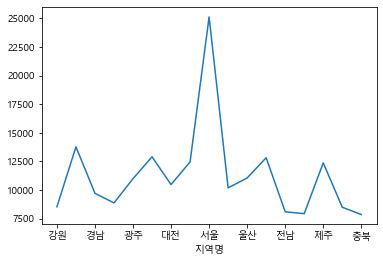

In [100]:
g.plot()

#### 3.2.2. barplot

<AxesSubplot:xlabel='지역명'>

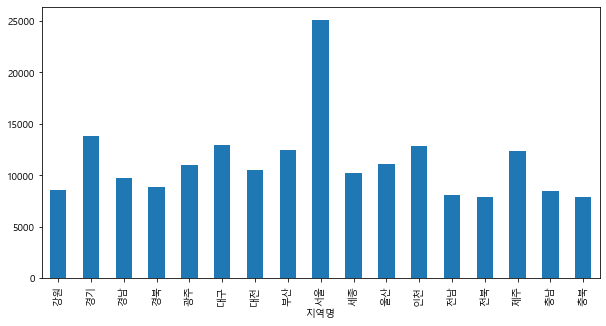

In [103]:
g.plot(kind='bar',figsize=(10,5))

<AxesSubplot:xlabel='지역명'>

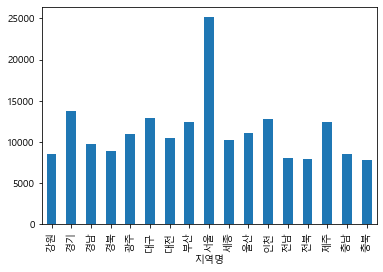

In [104]:
g.plot.bar()

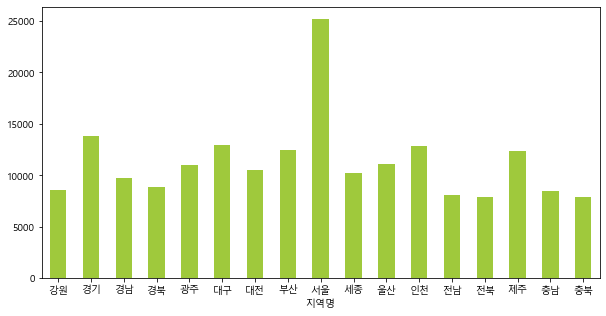

In [111]:
a = g.plot.bar(rot = 0, figsize=(10,5), color= '#9FC93C')  # rot : 글자 가로로
#plt.show()
# 변수에 할당을 시켜주거나, plt.show()를 사용해서 보면 <AxesSubplot:xlabel='지역명'> 없이 볼 수 있음

<AxesSubplot:xlabel='지역명'>

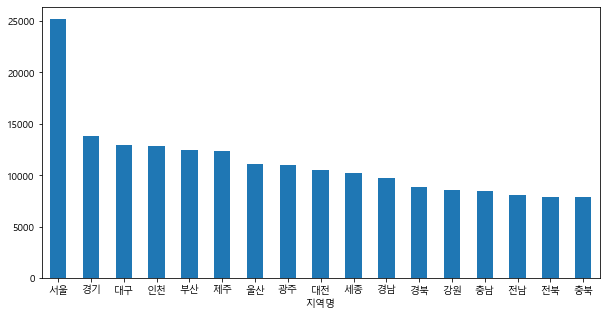

In [117]:
g =df2.groupby(['지역명'])['평당분양가격'].mean().sort_values(ascending=False)
g

g.plot.bar(rot=0, figsize=(10,5))

전용면적별 분양가격의 평균값을 구하고 그래프로 표현

<AxesSubplot:xlabel='전용면적'>

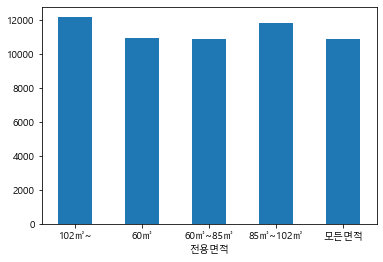

In [120]:
# 전용면적으로 분양가격의 평균을 구하고 막대그래프(bar)로 시각화 합니다.
df2.groupby(['전용면적'])['평당분양가격'].mean().plot.bar(rot=0)


<AxesSubplot:xlabel='연도'>

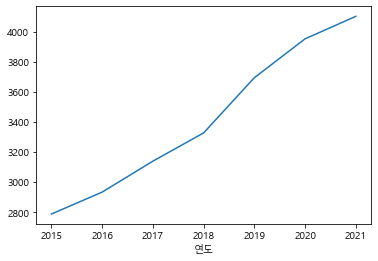

In [122]:
# 연도별 분양가격의 평균을 구하고 막대그래프(bar)로 시각화
df2.groupby(['연도'])['분양가격'].mean().plot()

<AxesSubplot:xlabel='연도'>

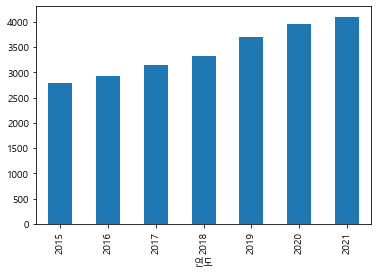

In [123]:
df2.groupby(['연도'])['분양가격'].mean().plot(kind='bar')

#### 3.2.3. box plot

![Box Plot](https://justinsighting.com/wp-content/uploads/2016/12/boxplot-description.png)   
- image source : https://justinsighting.com/how-to-interpret-box-plots/
- IQR(Inter Quartile Range) = (3Q-1Q)*1.5
- Upper Whisker 구간 = 3Q+IQR
- Lower Whisker 구간 = 1Q-IQR
- Outliers 가 얼마나 많이 분포되어있는 알아볼때 많이 사용
- 최소값
- 제 1사분위수 : 1st Quartile
- 제 2사분위수( ) : Median
- 제 3 사분위 수( ) : 3rd Quartile
- 최대값

In [124]:
# index를 월, columns 를 연도로 구하고 평당분양가격 으로 pivot_table 을 구함
# 연도별 평당분양가격으로 그래프 그리기

df2.pivot_table(index='연도', values='평당분양가격')

,평당분양가격
연도,
2015,9202.735802
2016,9683.025000
2017,10360.487653
2018,10978.938411
2019,12188.293092
2020,13039.422449
2021,13532.229916


<AxesSubplot:>

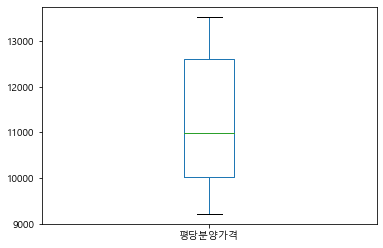

In [125]:
df2.pivot_table(index='연도', values='평당분양가격').plot(kind='box')

<AxesSubplot:>

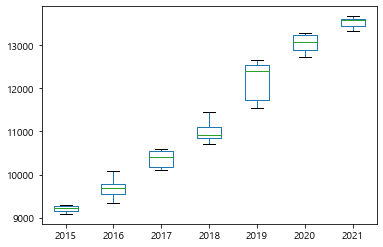

In [135]:
df2.pivot_table(index='월',columns = '연도', values='평당분양가격').plot.box()

In [131]:
df2.pivot_table(index='월',columns = '연도', values='평당분양가격')[2018].describe()

count       12.000000
mean     10977.340155
std        211.172094
min      10719.148000
25%      10854.069079
50%      10917.993132
75%      11098.931593
max      11453.822368
Name: 2018, dtype: float64

In [132]:
df2.pivot_table(index='월',columns = '연도', values='평당분양가격')[2019].describe()

count       12.000000
mean     12186.884106
std        453.768324
min      11535.540789
25%      11735.930684
50%      12413.368000
75%      12550.446841
max      12647.785714
Name: 2019, dtype: float64

<AxesSubplot:>

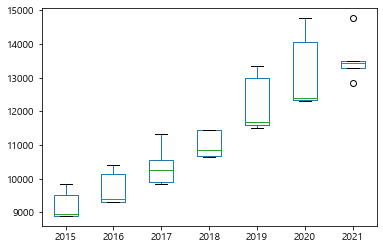

In [134]:
df2.pivot_table(index='전용면적',columns = '연도', values='평당분양가격').plot.box()

### 3.3. Seaborn 으로 시각화 해보기
- matplotlib을 기반으로 다양한 색상과 차트를 지원하는 라이브러리
- 아름다운 디자인, 통계기능 기반의 차트(각종 통계값을 계산하지 않고 seaborn 자체 기능으로 계산가능)
- https://seaborn.pydata.org/

In [136]:
# 라이브러리 로드하기
import seaborn as sns

#### 3.3.1. barplot

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

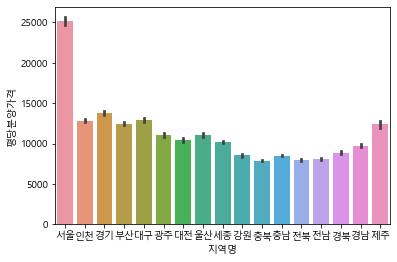

In [144]:
sns.barplot(data=df2, x='지역명', y='평당분양가격')   # palette로 그래프 색상변경 가능

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

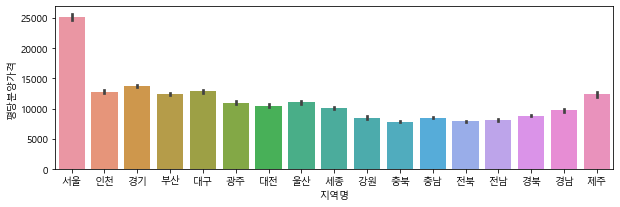

In [150]:
plt.figure(figsize=(10,3))

sns.barplot(data=df2, x='지역명', y='평당분양가격')
#sns.barplot(data=df2, x='지역명', y='평당분양가격', estimator=np.min)  # estimator 기본값 : 평균

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

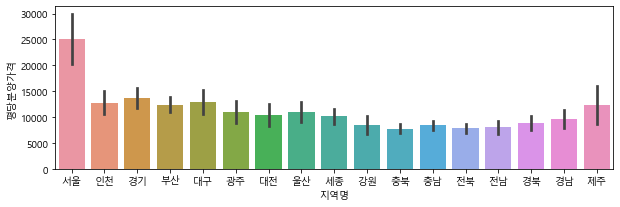

In [151]:
plt.figure(figsize=(10,3))

sns.barplot(data=df2, x='지역명', y='평당분양가격', ci='sd')   # ci : 신뢰구간(기본값:95)/ 'sd' : 표준편차

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

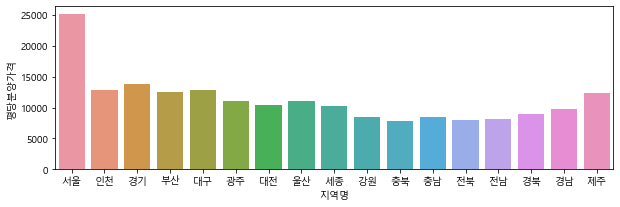

In [152]:
plt.figure(figsize=(10,3))

sns.barplot(data=df2, x='지역명', y='평당분양가격', ci=None)

In [155]:
g =df2.groupby(['지역명'])['평당분양가격'].mean().sort_values(ascending=False).to_frame()
g

,평당분양가격
지역명,
서울,25133.343529
경기,13780.955294
대구,12908.695482
인천,12830.350893
부산,12463.265294
제주,12380.626619
울산,11059.632110
광주,11000.277895
대전,10485.775984


<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

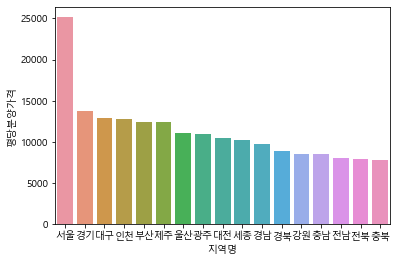

In [156]:
sns.barplot(data=g, x=g.index, y='평당분양가격', ci=None)  # ci : 신뢰구간


<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

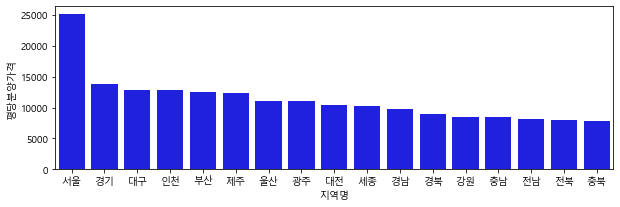

In [158]:
plt.figure(figsize=(10,3))
sns.barplot(data=g, x=g.index, y='평당분양가격', ci=None, color='b')

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

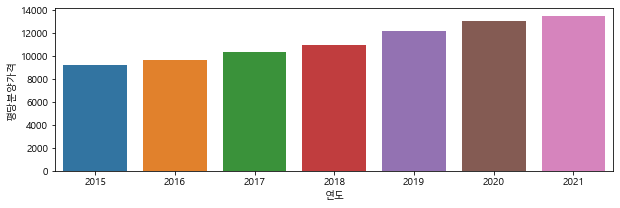

In [159]:
plt.figure(figsize=(10,3))
sns.barplot(data=df2, x='연도', y='평당분양가격', ci=None)

#### 3.3.2. catplot
- 서브플롯을 그릴 수 있다.

<Figure size 720x216 with 0 Axes>

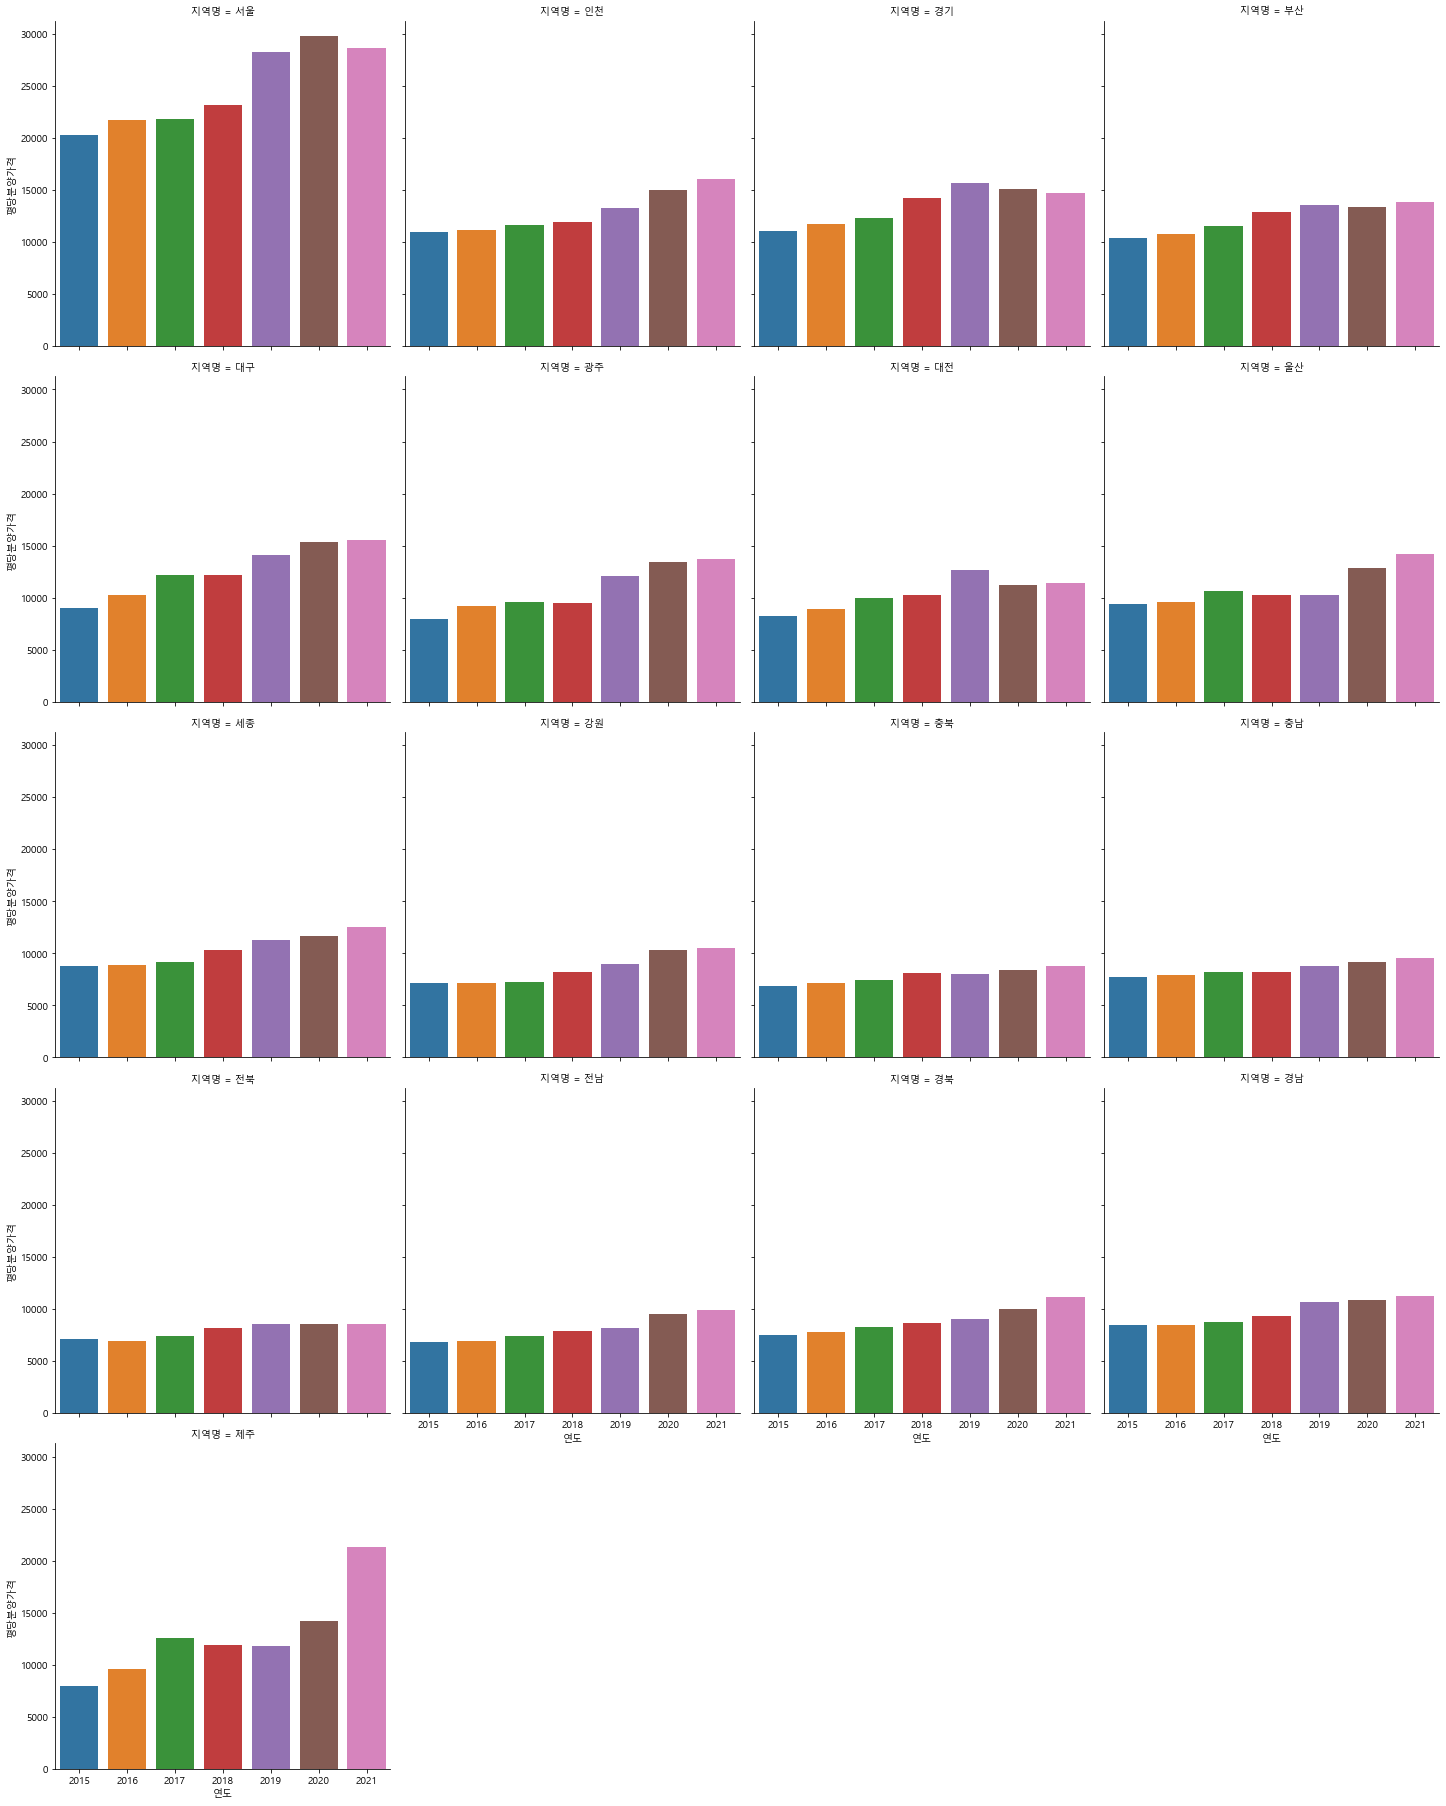

In [163]:
plt.figure(figsize=(10,3))
sns.catplot(data=df2, x='연도', y='평당분양가격',kind='bar', col='지역명',col_wrap=4, ci=None)

#### 3.3.3. lineplot

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

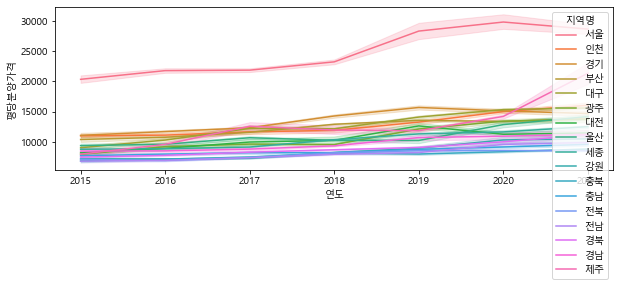

In [167]:
plt.figure(figsize=(10,3))
sns.lineplot(data=df2, x='연도', y='평당분양가격', hue='지역명')

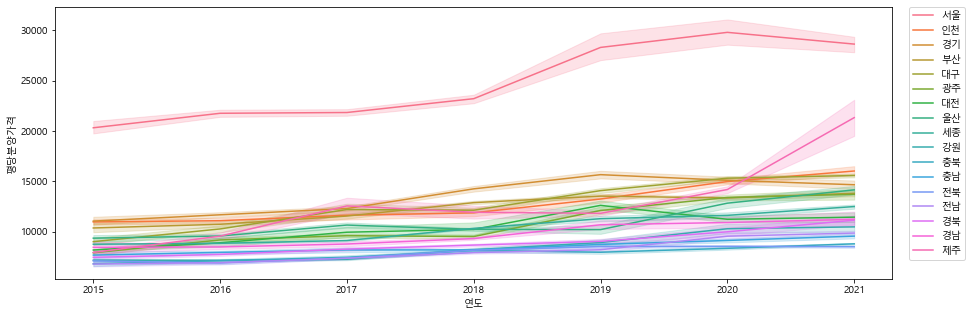

In [168]:
plt.figure(figsize=(15,5))

sns.lineplot(data=df2, x='연도', y='평당분양가격', hue='지역명')

# 1.02, 1 : 그래프 범례사이 간격
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)  # 1.02 : 그래프와 범례 사이 간격 (조절가능)



#### 3.3.4. relplot
- 두 변수 간의 관계를 보여줄 때 사용하는 seaborn 그래프

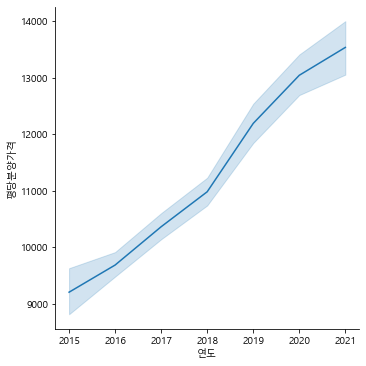

In [170]:
sns.relplot(data=df2, x='연도', y='평당분양가격', kind='line')

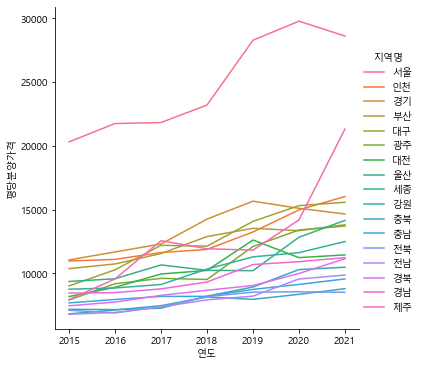

In [172]:
sns.relplot(data=df2, x='연도', y='평당분양가격', kind='line', hue='지역명', ci=None)

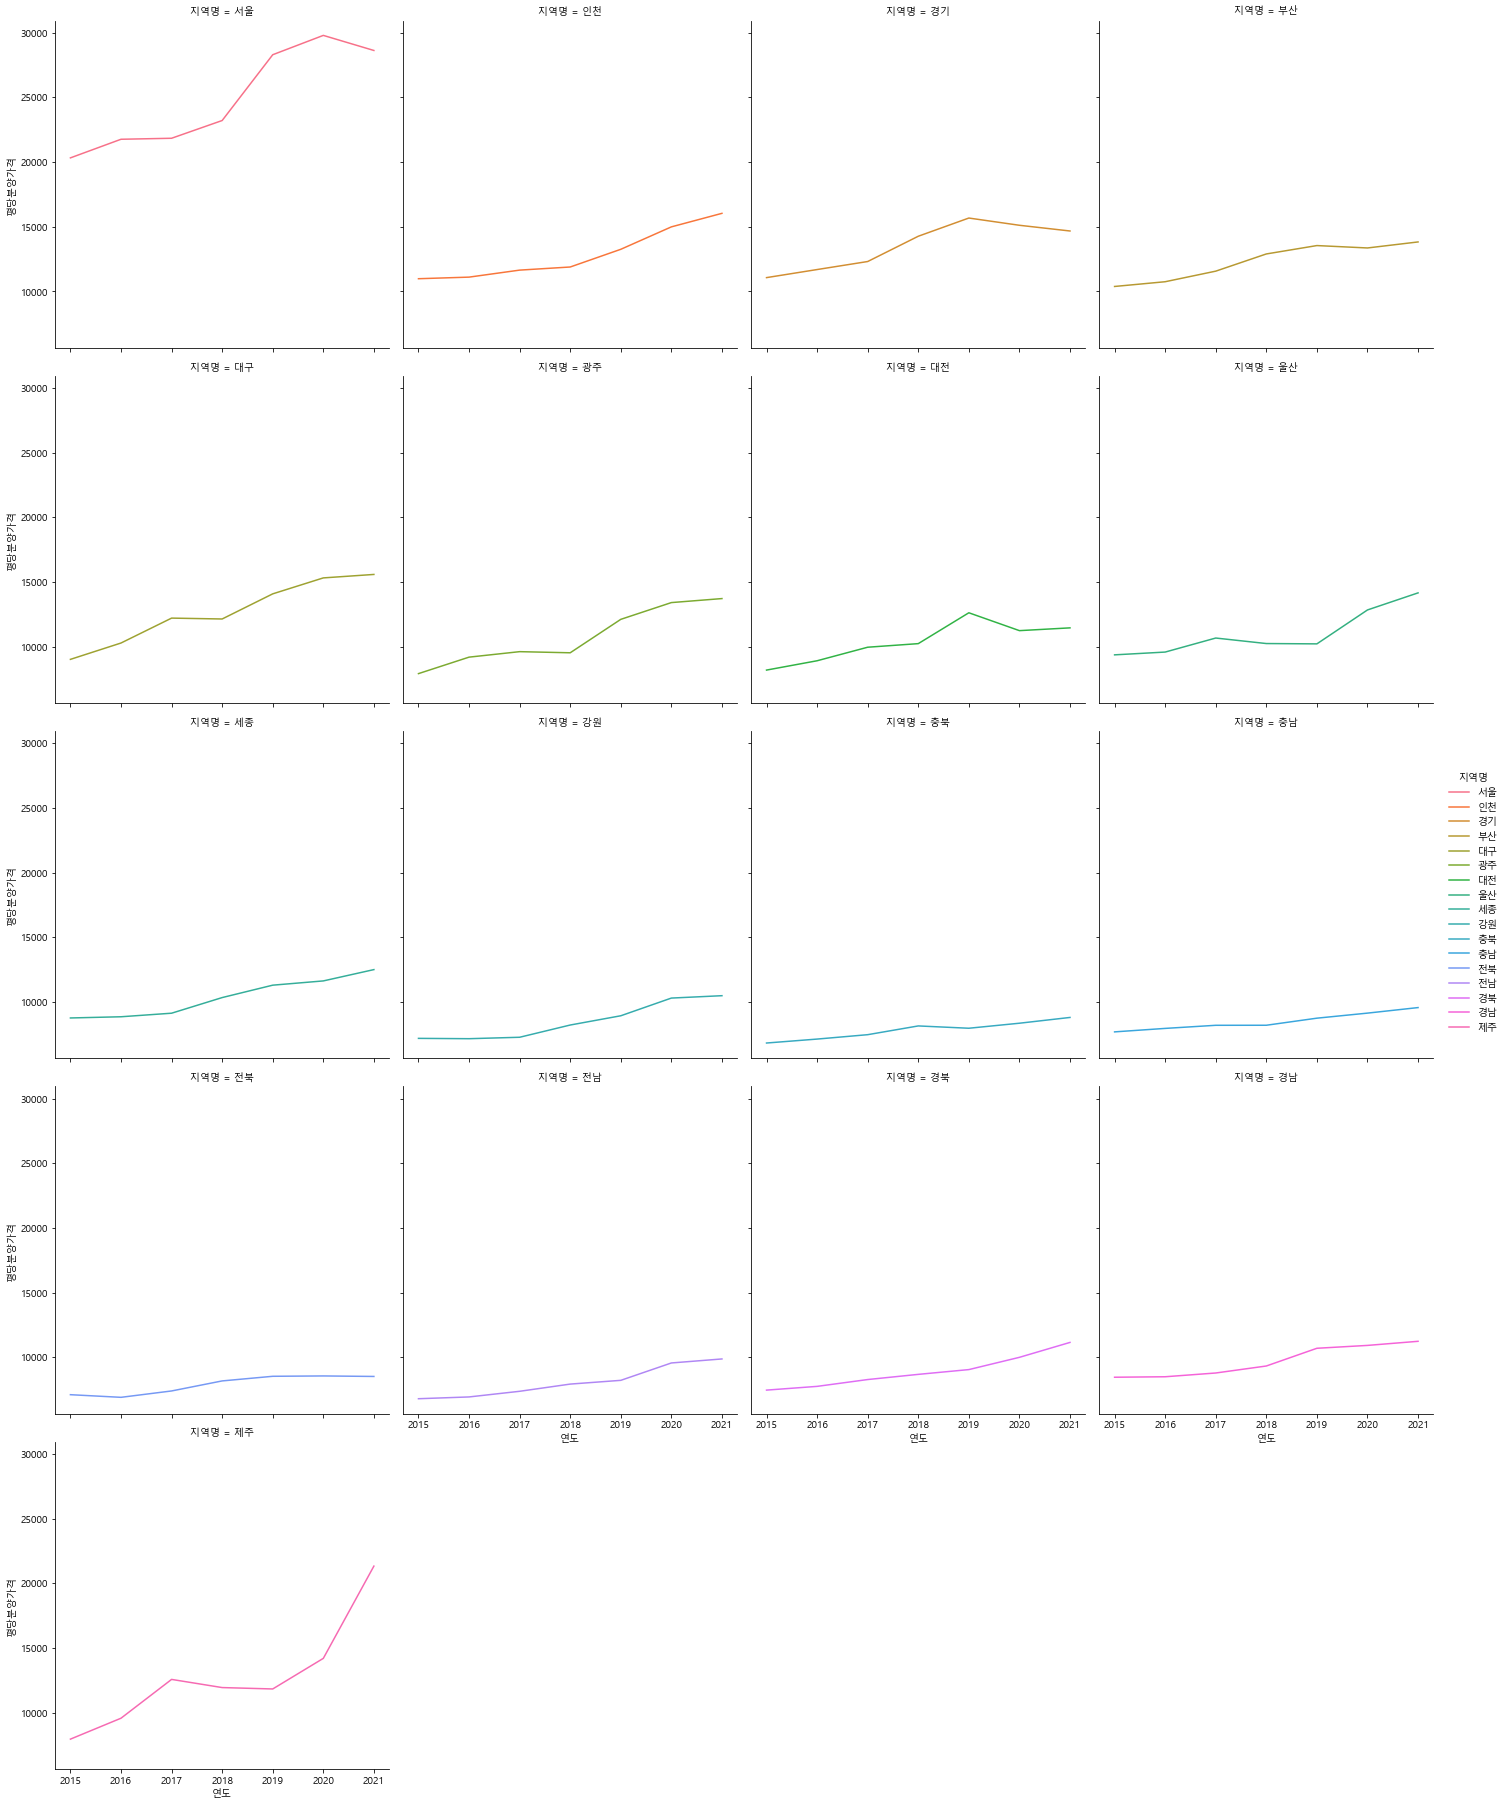

In [175]:
sns.relplot(data=df2, x='연도', y='평당분양가격', kind='line', hue='지역명', ci=None, 
           col='지역명', col_wrap=4)

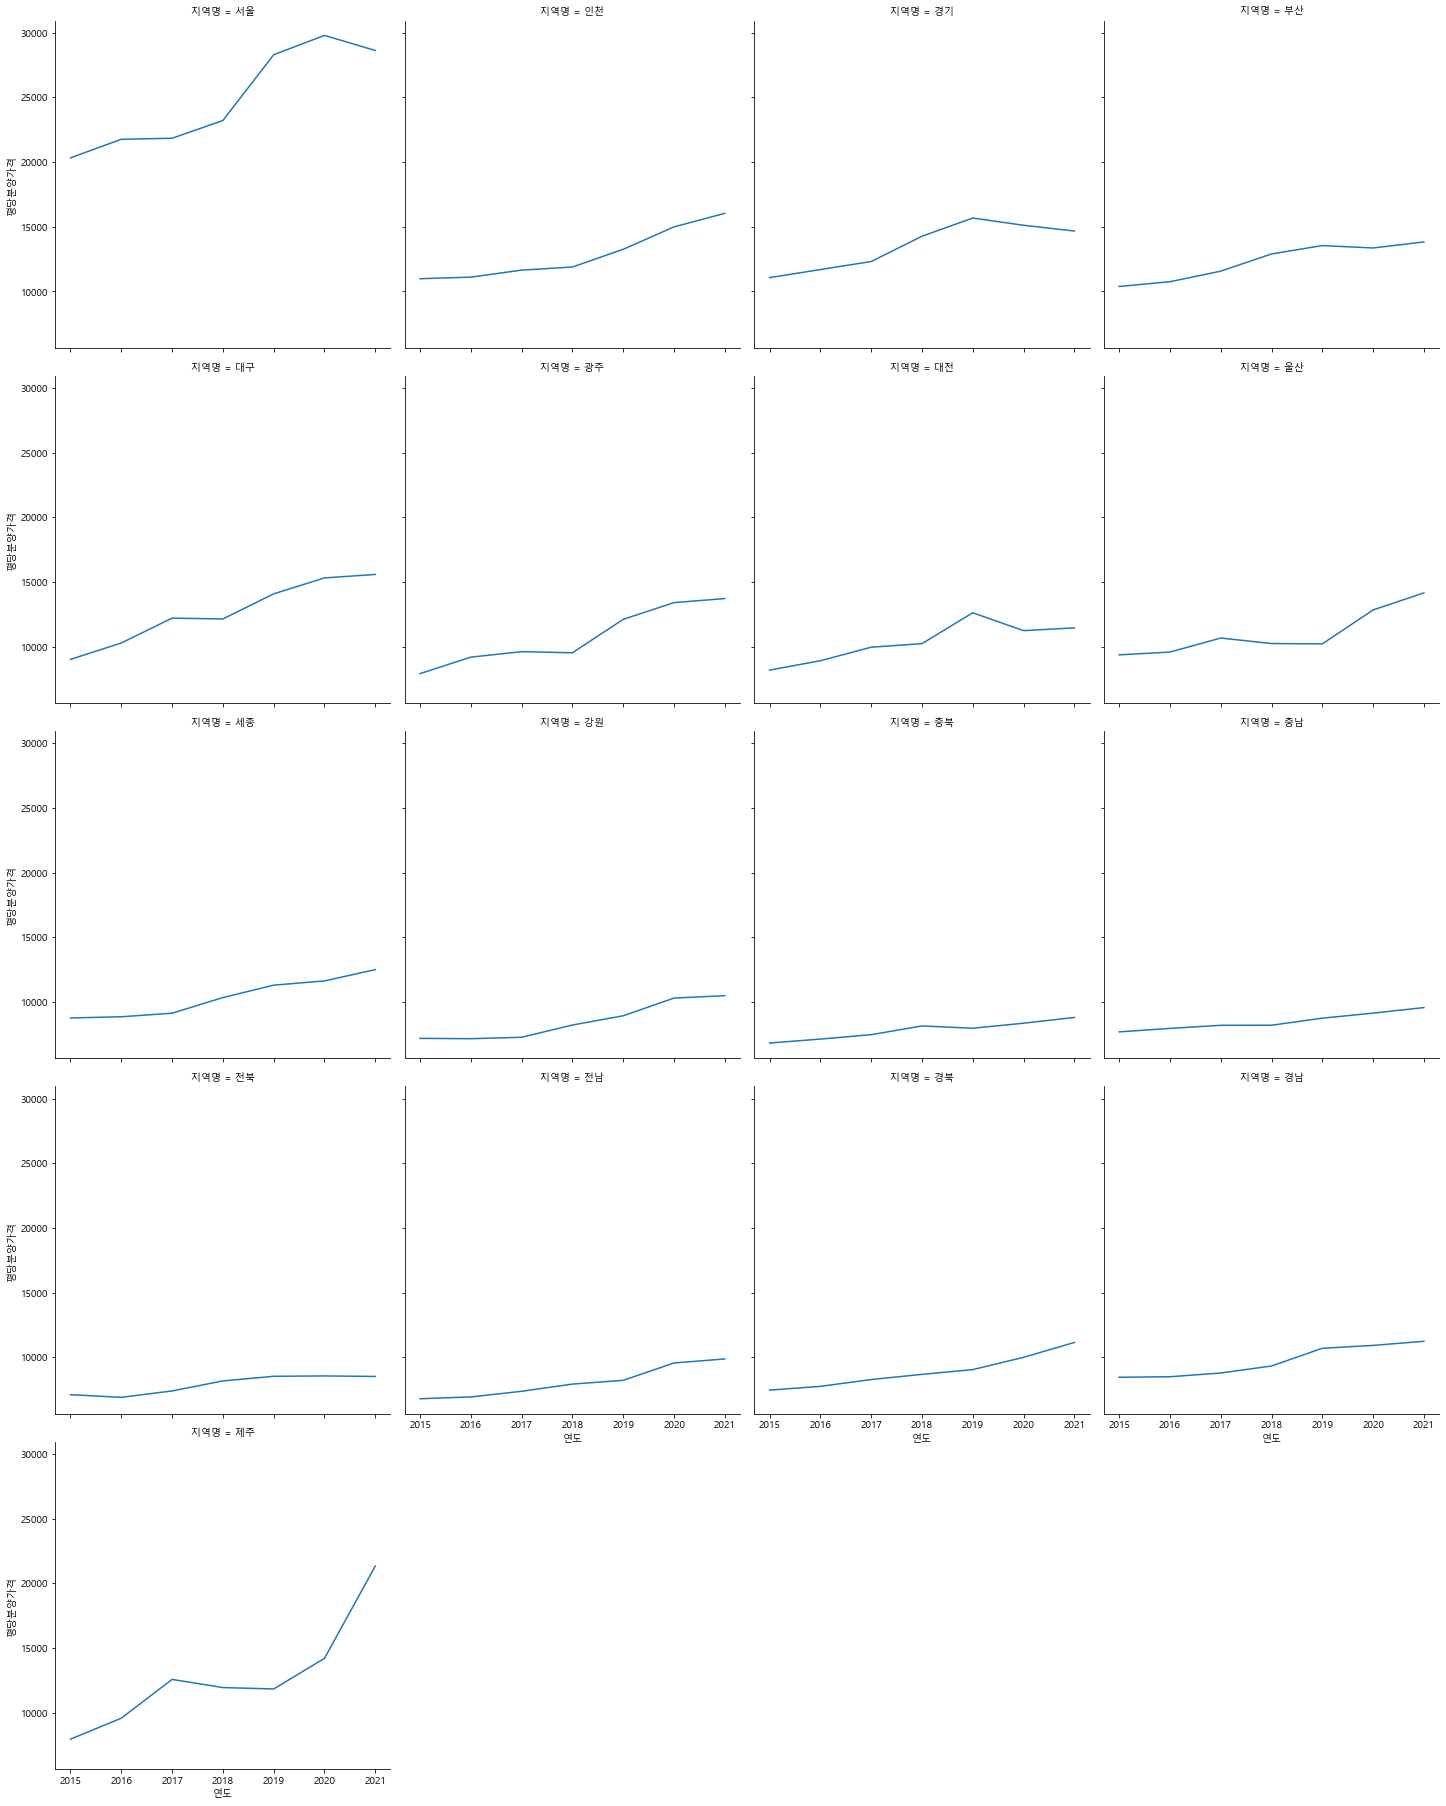

In [176]:
# column으로 나눠줬기 때문에 hue 옵션 안 해줘도 됨
sns.relplot(data=df2, x='연도', y='평당분양가격', kind='line', ci=None, 
           col='지역명', col_wrap=4)

#### 3.3.5. boxplot과 violinplot

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

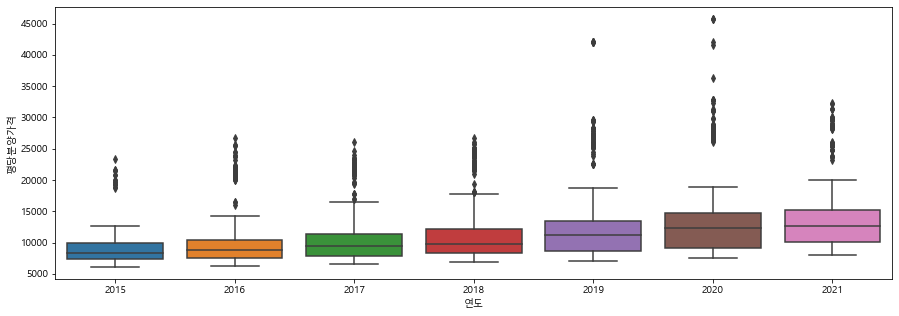

In [177]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df2, x='연도', y='평당분양가격')

In [182]:
p = df2.pivot_table(index='월',columns = '연도', values='평당분양가격')
p
# >> 이미 가공된 데이터

연도,2015,2016,2017,2018,2019,2020,2021
월,,,,,,,
1,NaN,9334.029630,10095.132143,10719.148000,11535.540789,12718.243421,13322.601266
2,NaN,9361.440000,10110.885714,10766.668000,11574.793421,12717.896053,13406.730380
3,NaN,9423.276923,10107.428571,10905.488000,11610.094737,12739.188000,13672.062963
4,NaN,9601.993902,10217.232143,10920.728571,11777.876000,12954.291429,13599.018293
5,NaN,9602.396341,10358.819277,11087.485714,11976.394737,12993.154167,13574.320253
6,NaN,9676.042683,10431.618072,10921.928571,12401.884000,13167.916667,13613.600000
7,NaN,9700.551220,10549.536585,10868.376316,12424.852000,12997.852703,NaN
8,NaN,9719.023171,10564.869512,10811.147368,12523.896000,13226.678873,NaN
9,NaN,9737.656098,10583.601266,10915.257692,12527.571429,13275.342254,NaN


<AxesSubplot:xlabel='연도'>

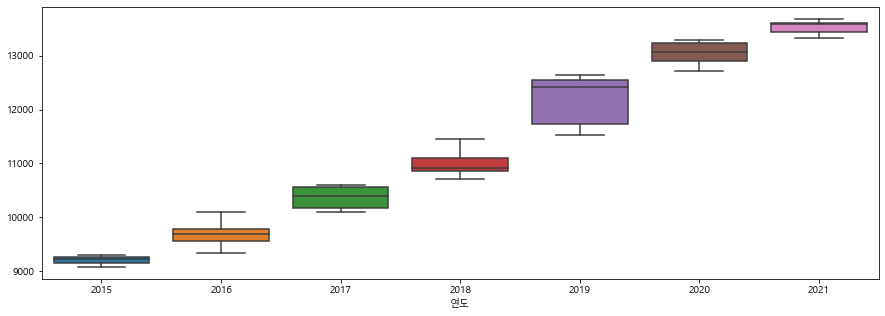

In [181]:
# 연도마다 값이 12개만 들어있기 때문에 이런 그래프가 나옴
plt.figure(figsize=(15,5))
sns.boxplot(data=p)

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

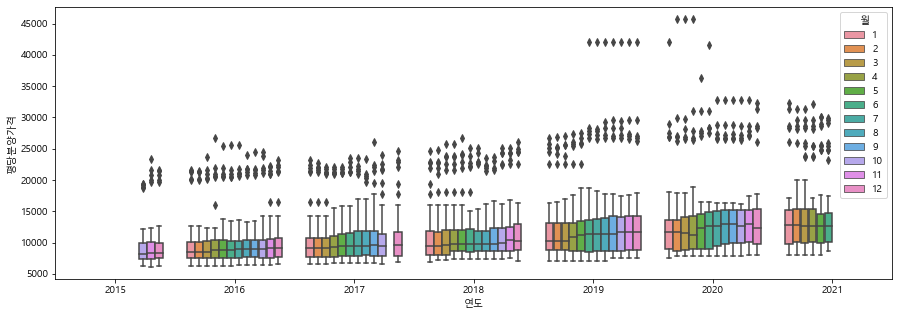

In [183]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df2, x='연도', y='평당분양가격', hue='월')

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

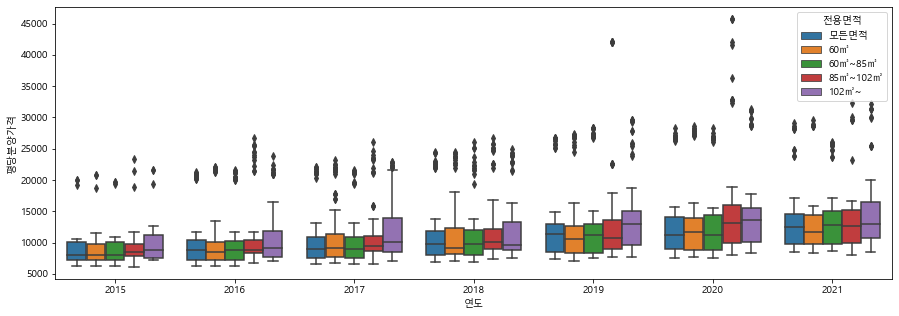

In [184]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df2, x='연도', y='평당분양가격', hue='전용면적')

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

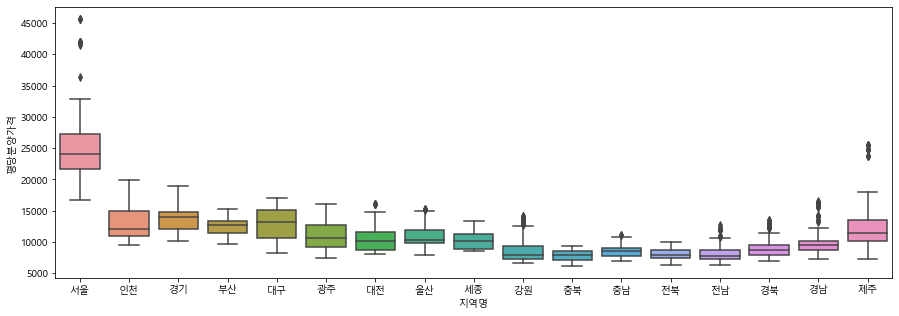

In [185]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df2, x='지역명', y='평당분양가격')

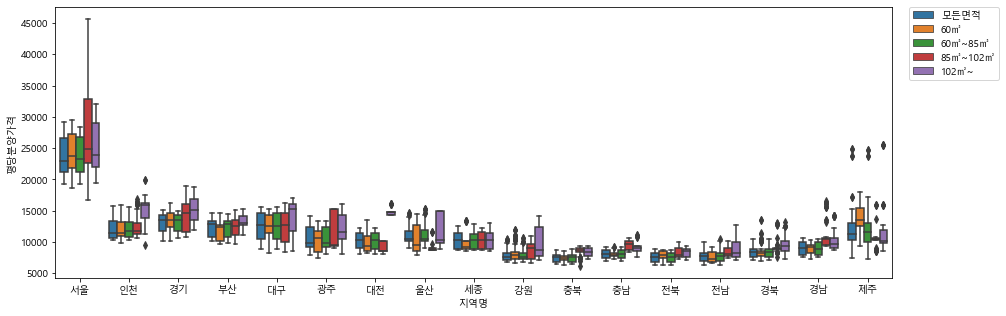

In [186]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df2, x='지역명', y='평당분양가격', hue='전용면적')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

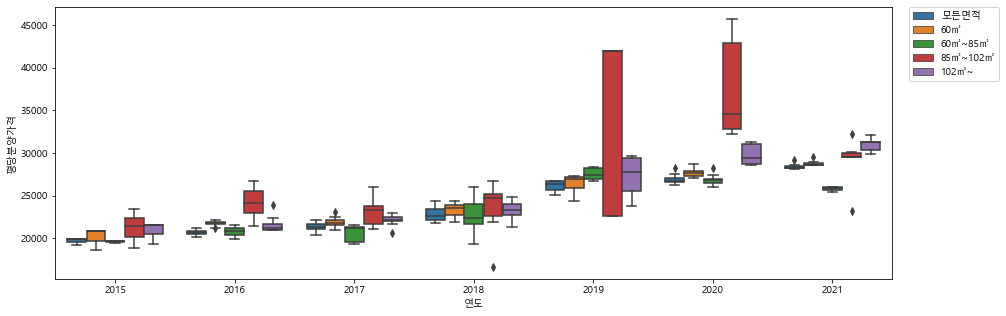

In [188]:
df2_seoul = df2[df2['지역명']=='서울']
df2_seoul

plt.figure(figsize=(15,5))
sns.boxplot(data=df2_seoul, x='연도', y='평당분양가격', hue='전용면적')

plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

**violinplot**
- 곡선진 부분 (뚱뚱한 부분)은 데이터의 분포
- 양쪽 끝 뾰족한 부분은 데이터의 최소값과 최대값

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

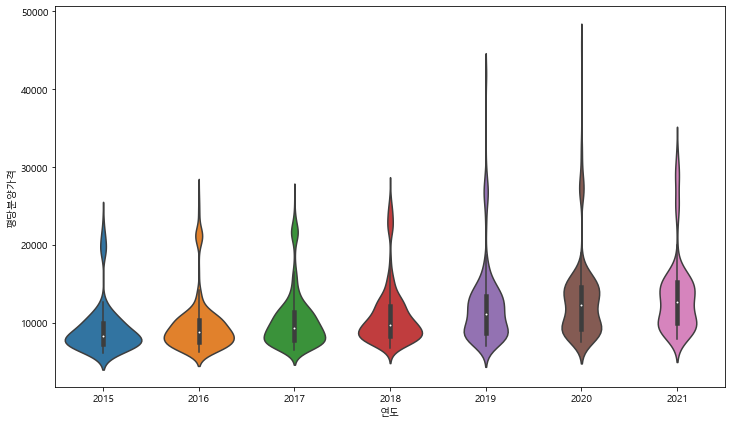

In [189]:
plt.figure(figsize=(12,7))
sns.violinplot(data=df2, x='연도', y='평당분양가격')

#### 3.3.6. 이상치 보기

In [190]:
df2['평당분양가격'].describe()

count     5317.000000
mean     11332.139176
std       4616.927883
min       6164.400000
25%       8438.100000
50%      10074.900000
75%      12863.400000
max      45655.500000
Name: 평당분양가격, dtype: float64

In [192]:
max_price = df2['평당분양가격'].max()
max_price

45655.5

In [193]:
df2[df2['평당분양가격']==max_price]

,지역명,전용면적,연도,월,분양가격,평당분양가격
4423,서울,85㎡~102㎡,2020,2,13835.0,45655.5
4508,서울,85㎡~102㎡,2020,3,13835.0,45655.5
4593,서울,85㎡~102㎡,2020,4,13835.0,45655.5


## 4. 2015년 8월 이전 데이터 보기

In [196]:
# 모든 컬럼 출력되도록 설정
pd.options.display.max_columns=25   # 컬럼 25개까지 볼 수 있도록

df1.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,8449,8403,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,9973,10016,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,7802,7707,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [197]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [198]:
df1.isnull().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

### 4.1. melt()를 사용하여 데이터 재구성하기
- pandas의 melt를 사용하여 Tidy data 만들기(데이터의 형태 변경)

In [200]:
df1.melt?

In [203]:
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                        'B': {0: 1, 1: 3, 2: 5},
                        'C': {0: 2, 1: 4, 2: 6}})
df

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [204]:
pd.melt(df)

,variable,value
0,A,a
1,A,b
2,A,c
3,B,1
4,B,3
5,B,5
6,C,2
7,C,4
8,C,6


In [207]:
pd.melt(df, id_vars=['A'], value_vars=['B'])

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5


In [211]:
df1.melt(id_vars='지역')

,지역,variable,value
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098
...,...,...,...
352,전북,2015년8월,6580
353,전남,2015년8월,6289
354,경북,2015년8월,7037
355,경남,2015년8월,7665


In [213]:
df1_melt = df1.melt(id_vars='지역', var_name='기간', value_name='평당분양가격')
df1_melt

,지역,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098
...,...,...,...
352,전북,2015년8월,6580
353,전남,2015년8월,6289
354,경북,2015년8월,7037
355,경남,2015년8월,7665


In [214]:
df1_melt.columns = ['지역명', '기간', '평당분양가격']
df1_melt.head(1)

,지역명,기간,평당분양가격
0,서울,2013년12월,18189


In [215]:
df2.head(1)

,지역명,전용면적,연도,월,분양가격,평당분양가격
0,서울,모든면적,2015,10,5841.0,19275.3


### 4.2. 연도와 월을 분리하기
* pandas 의 string-handling 사용하기 : https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling

In [221]:
date = '2013년12월'
date

'2013년12월'

In [222]:
date.split('년')


['2013', '12월']

In [223]:
date.split('년')[0]

'2013'

In [225]:
date.split('년')[-1].replace('월','')

'12'

In [226]:
def parse_year(date) :
    year = int(date.split('년')[0])
    return year

In [227]:
y = parse_year(date)
y

2013

In [228]:
def parse_month(date) :
    month = int(date.split('년')[-1].replace('월',''))
    return month

In [230]:
parse_month(date)

12

In [232]:
df1_melt['연도'] = df1_melt['기간'].apply(parse_year)
df1_melt.head(1)

,지역명,기간,평당분양가격,연도
0,서울,2013년12월,18189,2013


In [233]:
df1_melt['월'] = df1_melt['기간'].apply(parse_month)
df1_melt.head(1)

,지역명,기간,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12


### 4.3. 데이터 합치기

In [235]:
df2.head()

,지역명,전용면적,연도,월,분양가격,평당분양가격
0,서울,모든면적,2015,10,5841.0,19275.3
1,서울,60㎡,2015,10,5652.0,18651.6
2,서울,60㎡~85㎡,2015,10,5882.0,19410.6
3,서울,85㎡~102㎡,2015,10,5721.0,18879.3
4,서울,102㎡~,2015,10,5879.0,19400.7


In [237]:
df1_melt.head()

,지역명,기간,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12


In [240]:
df2[df2['전용면적']=='모든면적'][['지역명','연도','월','평당분양가격']]

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3
5,인천,2015,10,10437.9
10,경기,2015,10,10355.4
15,부산,2015,10,10269.6
20,대구,2015,10,8850.6
...,...,...,...,...
5840,전북,2021,6,8814.3
5845,전남,2021,6,10074.9
5850,경북,2021,6,10061.7
5855,경남,2021,6,10230.0


In [242]:
df2.columns.to_list()

['지역명', '전용면적', '연도', '월', '분양가격', '평당분양가격']

In [243]:
cols = ['지역명', '연도', '월', '평당분양가격']
cols

['지역명', '연도', '월', '평당분양가격']

In [247]:
df2_prepare = df2.loc[df2['전용면적']=='모든면적',cols].copy()   #원본인 df2에 영향을 미치기 때문에 사본으로 
df2_prepare.head()

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3
5,인천,2015,10,10437.9
10,경기,2015,10,10355.4
15,부산,2015,10,10269.6
20,대구,2015,10,8850.6


In [248]:
df1_prepare = df1_melt[cols].copy()
df1_prepare.head()

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189
1,부산,2013,12,8111
2,대구,2013,12,8080
3,인천,2013,12,10204
4,광주,2013,12,6098


In [250]:
df = pd.concat([df1_prepare, df2_prepare], ignore_index=True)   # ignor_index=True로 인덱스 정리 해줘야 함
df

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189.0
1,부산,2013,12,8111.0
2,대구,2013,12,8080.0
3,인천,2013,12,10204.0
4,광주,2013,12,6098.0
...,...,...,...,...
1525,전북,2021,6,8814.3
1526,전남,2021,6,10074.9
1527,경북,2021,6,10061.7
1528,경남,2021,6,10230.0


In [251]:
df['연도'].value_counts()

2014    204
2016    204
2017    204
2018    204
2019    204
2020    204
2015    187
2021    102
2013     17
Name: 연도, dtype: int64

### 4.4 pivot_table로 분석하기

In [254]:
p = pd.pivot_table(df, index='연도', columns='지역명', values='평당분양가격').round()
p

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.0,10855.0,6473.0,6168.0,6098.0,8080.0,8321.0,8111.0,18189.0,7601.0,8090.0,10204.0,5678.0,6282.0,7674.0,6365.0,6589.0
2014,6332.0,10509.0,6729.0,6536.0,7588.0,8286.0,8240.0,9180.0,18997.0,8085.0,8362.0,10075.0,5719.0,6362.0,7855.0,6682.0,6620.0
2015,6831.0,10489.0,7646.0,7035.0,7956.0,8707.0,8105.0,9633.0,19283.0,8641.0,9273.0,10277.0,6109.0,6623.0,7465.0,7024.0,6700.0
2016,7011.0,11220.0,7848.0,7361.0,8899.0,10310.0,8502.0,10430.0,20663.0,8860.0,10209.0,10532.0,6489.0,6418.0,9129.0,7331.0,6770.0
2017,7127.0,11850.0,8120.0,7795.0,9464.0,11456.0,9045.0,11578.0,21376.0,9135.0,11345.0,10737.0,7188.0,7058.0,10831.0,7456.0,6763.0
2018,7681.0,13186.0,9019.0,8505.0,9856.0,12076.0,10180.0,12998.0,22889.0,10355.0,10241.0,11274.0,7789.0,7626.0,11891.0,8013.0,7874.0
2019,8142.0,14469.0,9871.0,8857.0,11823.0,13852.0,11778.0,13116.0,26131.0,11079.0,10022.0,12635.0,7902.0,8197.0,12138.0,8607.0,7575.0
2020,9331.0,14383.0,10161.0,9545.0,12500.0,15145.0,11094.0,13248.0,26910.0,11355.0,12203.0,14674.0,8697.0,8317.0,14541.0,8856.0,7960.0
2021,9822.0,14243.0,10216.0,10134.0,13800.0,15451.0,11532.0,14319.0,28436.0,12533.0,14190.0,15432.0,9745.0,8763.0,21899.0,9165.0,8599.0


**heatmap으로 그려보기**
- 색상으로 표현할 수 있는 다양한 정보를 일정한 이미지위에 열분포 형태의 비쥬얼한 그래픽으로 출력하는 것이 특징이다

<AxesSubplot:xlabel='지역명', ylabel='연도'>

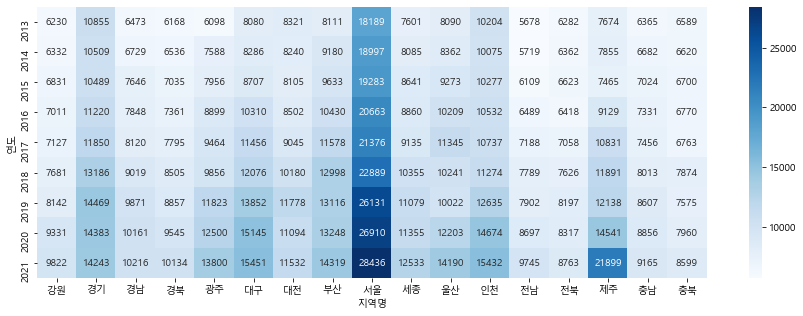

In [262]:
plt.figure(figsize=(15,5))
#sns.heatmap(p)

sns.heatmap(p, cmap='Blues', annot=True, fmt='.0f')

<AxesSubplot:xlabel='연도', ylabel='지역명'>

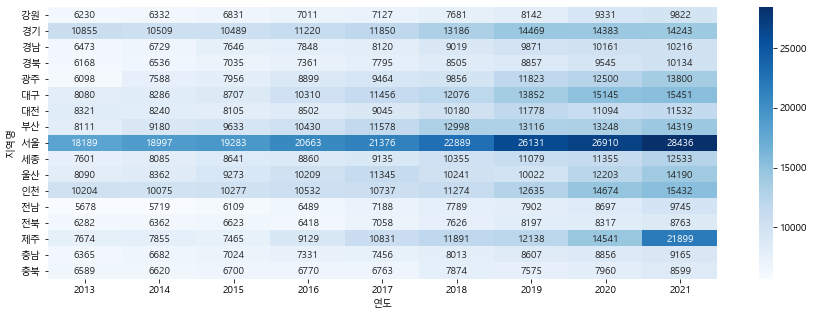

In [264]:
plt.figure(figsize=(15,5))
#sns.heatmap(p)

sns.heatmap(p.T, cmap='Blues', annot=True, fmt='.0f')   # p.T 로 뒤집어진 결과 확인

### 4. 5. groupby로 분석하기

In [265]:
p

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.0,10855.0,6473.0,6168.0,6098.0,8080.0,8321.0,8111.0,18189.0,7601.0,8090.0,10204.0,5678.0,6282.0,7674.0,6365.0,6589.0
2014,6332.0,10509.0,6729.0,6536.0,7588.0,8286.0,8240.0,9180.0,18997.0,8085.0,8362.0,10075.0,5719.0,6362.0,7855.0,6682.0,6620.0
2015,6831.0,10489.0,7646.0,7035.0,7956.0,8707.0,8105.0,9633.0,19283.0,8641.0,9273.0,10277.0,6109.0,6623.0,7465.0,7024.0,6700.0
2016,7011.0,11220.0,7848.0,7361.0,8899.0,10310.0,8502.0,10430.0,20663.0,8860.0,10209.0,10532.0,6489.0,6418.0,9129.0,7331.0,6770.0
2017,7127.0,11850.0,8120.0,7795.0,9464.0,11456.0,9045.0,11578.0,21376.0,9135.0,11345.0,10737.0,7188.0,7058.0,10831.0,7456.0,6763.0
2018,7681.0,13186.0,9019.0,8505.0,9856.0,12076.0,10180.0,12998.0,22889.0,10355.0,10241.0,11274.0,7789.0,7626.0,11891.0,8013.0,7874.0
2019,8142.0,14469.0,9871.0,8857.0,11823.0,13852.0,11778.0,13116.0,26131.0,11079.0,10022.0,12635.0,7902.0,8197.0,12138.0,8607.0,7575.0
2020,9331.0,14383.0,10161.0,9545.0,12500.0,15145.0,11094.0,13248.0,26910.0,11355.0,12203.0,14674.0,8697.0,8317.0,14541.0,8856.0,7960.0
2021,9822.0,14243.0,10216.0,10134.0,13800.0,15451.0,11532.0,14319.0,28436.0,12533.0,14190.0,15432.0,9745.0,8763.0,21899.0,9165.0,8599.0


In [266]:
df.groupby(['연도','지역명'])['평당분양가격'].mean()

연도    지역명
2013  강원      6230.00
      경기     10855.00
      경남      6473.00
      경북      6168.00
      광주      6098.00
               ...   
2021  전남      9744.90
      전북      8762.60
      제주     21898.80
      충남      9165.20
      충북      8599.25
Name: 평당분양가격, Length: 153, dtype: float64

In [268]:
g = df.groupby(['연도','지역명'])['평당분양가격'].mean().unstack().round()
g

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.0,10855.0,6473.0,6168.0,6098.0,8080.0,8321.0,8111.0,18189.0,7601.0,8090.0,10204.0,5678.0,6282.0,7674.0,6365.0,6589.0
2014,6332.0,10509.0,6729.0,6536.0,7588.0,8286.0,8240.0,9180.0,18997.0,8085.0,8362.0,10075.0,5719.0,6362.0,7855.0,6682.0,6620.0
2015,6831.0,10489.0,7646.0,7035.0,7956.0,8707.0,8105.0,9633.0,19283.0,8641.0,9273.0,10277.0,6109.0,6623.0,7465.0,7024.0,6700.0
2016,7011.0,11220.0,7848.0,7361.0,8899.0,10310.0,8502.0,10430.0,20663.0,8860.0,10209.0,10532.0,6489.0,6418.0,9129.0,7331.0,6770.0
2017,7127.0,11850.0,8120.0,7795.0,9464.0,11456.0,9045.0,11578.0,21376.0,9135.0,11345.0,10737.0,7188.0,7058.0,10831.0,7456.0,6763.0
2018,7681.0,13186.0,9019.0,8505.0,9856.0,12076.0,10180.0,12998.0,22889.0,10355.0,10241.0,11274.0,7789.0,7626.0,11891.0,8013.0,7874.0
2019,8142.0,14469.0,9871.0,8857.0,11823.0,13852.0,11778.0,13116.0,26131.0,11079.0,10022.0,12635.0,7902.0,8197.0,12138.0,8607.0,7575.0
2020,9331.0,14383.0,10161.0,9545.0,12500.0,15145.0,11094.0,13248.0,26910.0,11355.0,12203.0,14674.0,8697.0,8317.0,14541.0,8856.0,7960.0
2021,9822.0,14243.0,10216.0,10134.0,13800.0,15451.0,11532.0,14319.0,28436.0,12533.0,14190.0,15432.0,9745.0,8763.0,21899.0,9165.0,8599.0


<AxesSubplot:xlabel='지역명', ylabel='연도'>

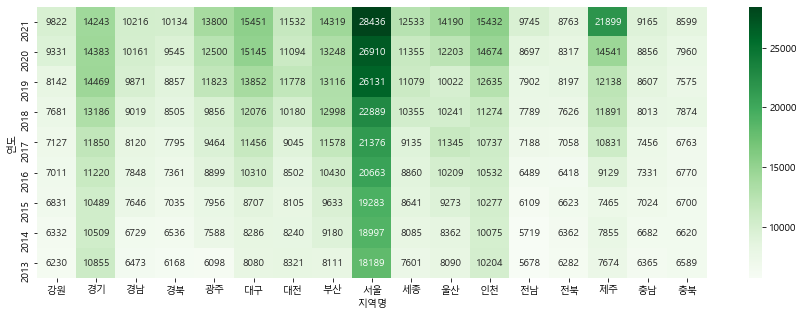

In [270]:
plt.figure(figsize=(15,5))
#sns.heatmap(p)
g = g.sort_index(ascending=False)
sns.heatmap(g, cmap='Greens', annot=True, fmt='.0f')